C:\Users\SeckinKintas\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SeckinKintas\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\SeckinKintas\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\SeckinKintas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


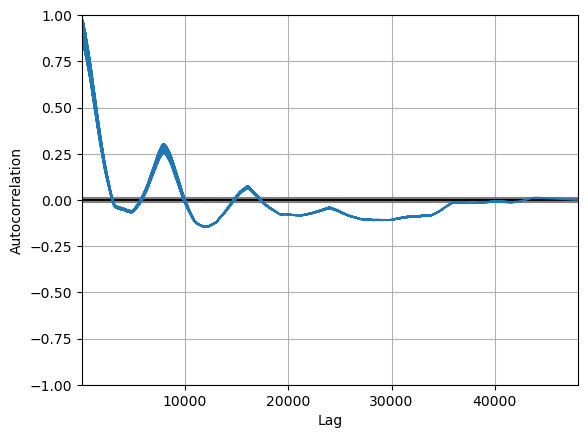

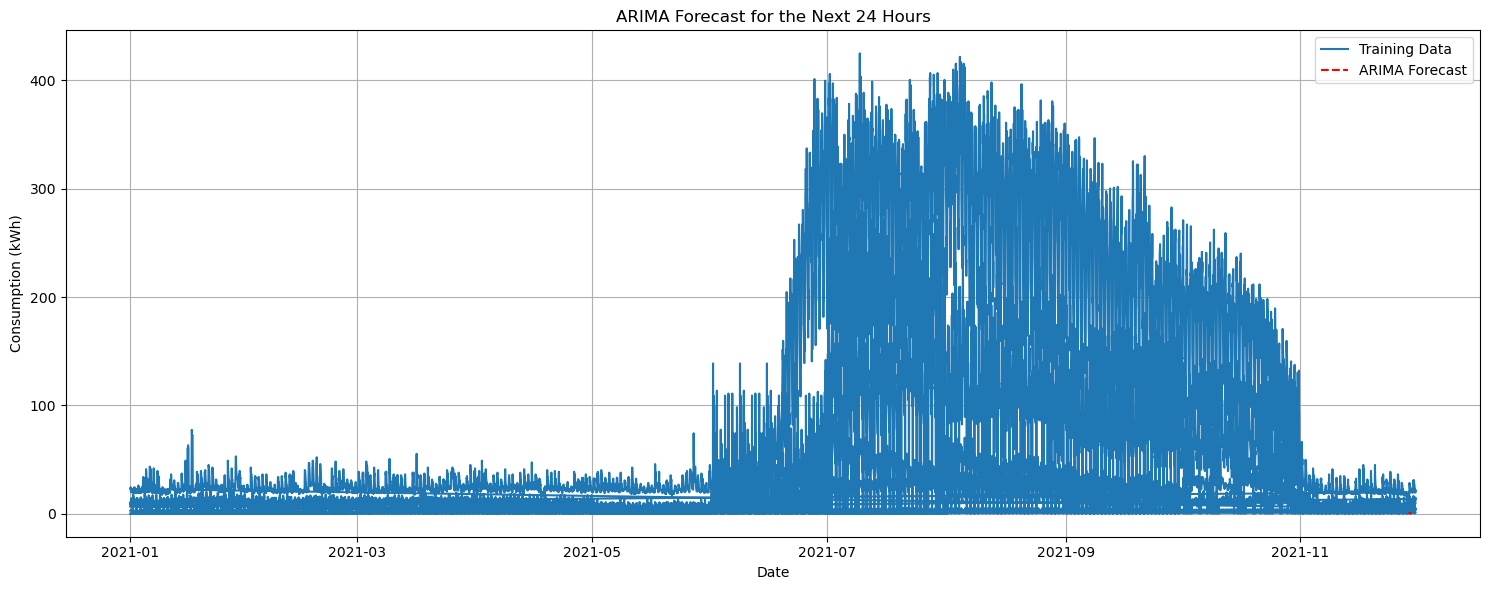

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_excel("hourly_data.xlsx")

# Drop unnecessary columns and set the hour column as the index
data = data[['hour', 'consumption_(kwh)']]
data.set_index('hour', inplace=True)

# Decompose the time series to observe its trend, seasonal, and residual components
result = seasonal_decompose(data['consumption_(kwh)'], model='additive', period=24)

# Reset the index for ARIMA and rename columns for clarity
data_reset = data.reset_index()
data_reset.columns = ['ds', 'y']

# Splitting the data into training and test sets
train_data = data_reset[:-24]
test_data = data_reset[-24:]

# Plot the autocorrelation to help decide the ARIMA parameters
autocorrelation_plot(train_data['y'])
plt.show()

# Train the ARIMA model
model_arima = ARIMA(train_data['y'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Forecast the next 24 hours
forecast_result = model_arima_fit.forecast(steps=24)
forecast = forecast_result.values

# Plot the forecast along with the original data
plt.figure(figsize=(15, 6))
plt.plot(train_data['ds'], train_data['y'], label='Training Data')
plt.plot(test_data['ds'], forecast, color='red', linestyle='--', label='ARIMA Forecast')
plt.title('ARIMA Forecast for the Next 24 Hours')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
forecasted_values = forecast_result

# Creating a dataframe to display the forecasted values along with their timestamps
forecasted_df = pd.DataFrame({
    'Hour': test_data['ds'],
    'Predicted_Consumption_(kWh)': forecasted_values
})

forecasted_df

,Hour,Predicted_Consumption_(kWh)
48048,2021-11-29 00:00:00,0.456368
48049,2021-11-29 01:00:00,0.456634
48050,2021-11-29 02:00:00,0.456648
48051,2021-11-29 03:00:00,0.456649
48052,2021-11-29 04:00:00,0.456649
48053,2021-11-29 05:00:00,0.456649
48054,2021-11-29 06:00:00,0.456649
48055,2021-11-29 07:00:00,0.456649
48056,2021-11-29 08:00:00,0.456649
48057,2021-11-29 09:00:00,0.456649
